# Filtracja

**Jednym z ważnych zagadnień w dziedzinie przetwarzania obrazów jest proces filtracji. Dzięki niemu można przygotować obrazy do dalszej obróbki lub wydobyć interesujące nas informacje. Filtracja jest niczym innym jak pewną operacją matematyczną na każdym pikselu, w oparciu o informacje zebrane z wielu innych pikseli w obrazie. Choć czasem wzory matematyczne wydają się skomplikowane, na szczęście nie musimy sami implementować tych algorytmów, gdyż w znakomitej większości są one już gotowe. Trzeba tylko wiedzieć, gdzie szukać.**

Poniżej prezentujemy jak można przeprowadzić filtrację uśredniającą, gaussowską oraz medianową. Najpierw na wybrany obraz dodaliśmy szum gaussowski oraz szum typu 'sól i pieprz' (*salt&pepper*), by w kolejnym kroku je odfiltrować, co pokaże nam skuteczność tej operacji. 

Standardowo zaczynamy od wczytania potrzebnych bibliotek oraz otwarcia obrazu (jeśli nie rozumiesz któregoś z zapisów, wróć do poprzedniego rozdziału).

In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('../obrazy_testowe/lena_512x512.png')
imgColArray = np.array(img)/255

Teraz dodamy szum do obrazu, a wynik zapiszemy jako nową zmienną, by móc się jeszcze do niej odwołać później. 

In [2]:
# szum Gaussa
row, col, ch= imgColArray.shape
mean = 0
var = 0.1
sigma = var**0.8
gauss = np.random.normal(mean, sigma, (row,col,ch))
gauss = gauss.reshape(row, col, ch)
imgGauss = imgColArray + gauss

# szum sól i pieprz
sp = 0.5
amount = 0.05
imgSaltPepper = np.copy(imgColArray)

numSalt = np.ceil(amount * imgColArray.size * sp)
coords = [np.random.randint(0, i - 1, int(numSalt)) for i in imgColArray.shape]
imgSaltPepper[tuple(coords)] = 1

numPepper = np.ceil(amount* imgColArray.size * (1. - sp))
coords = [np.random.randint(0, i - 1, int(numPepper)) for i in imgColArray.shape]
imgSaltPepper[tuple(coords)] = 0

Na tym etapie pozostało nam jeszcze jedynie wyświetlić wszystkie trzy obrazy, by sprawdzić, czy uzyskaliśmy żądany efekt. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


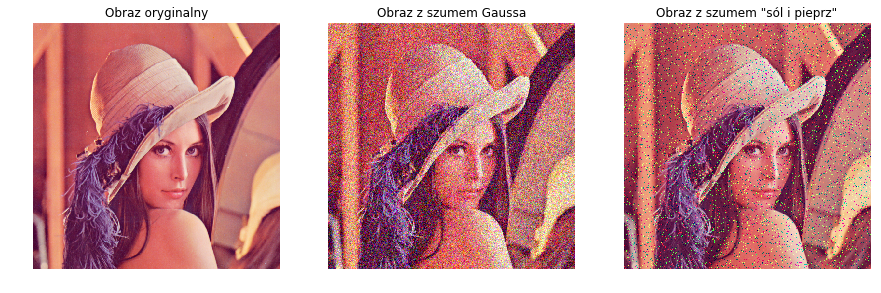

In [3]:
plt.figure(figsize = (15, 10))

plt.subplot(131)
plt.imshow(imgColArray)
plt.title('Obraz oryginalny')
plt.axis('off')

plt.subplot(132)
plt.imshow(imgGauss)
plt.title('Obraz z szumem Gaussa')
plt.axis('off')

plt.subplot(133)
plt.imshow(imgSaltPepper)
plt.title('Obraz z szumem "sól i pieprz"')
plt.axis('off')

plt.show()

Tak uzyskane obrazy poddamy procesowi filtracji. Zauważ, że każdą filtrację przeprowadzimy dla trzech wielkości masek, co od razu pokaże wpływ rozmiaru maski na wynik.

### Filtracja uśredniająca

Filtrację uśredniającą realizują dwie funkcje zaimplementowane w bibliotece Open CV (*cv2*): *blur()* oraz *boxFilter()*. Dokładny ich opis oraz nieznaczne różnice można znaleźć w dokumentacji - my użyjemy funkcji *cv2.blur()*. W najprostszym zastosowaniu należy podać jako argumenty obraz, który poddamy filtracji oraz wielkość maski (szerokość i wysokość). Dodatkowo można też określić punkt zaczepienia (domyślnie jest to środek maski), a także sposób ekstrapolacji pikseli znajdujących się poza krawędziami obrazu.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


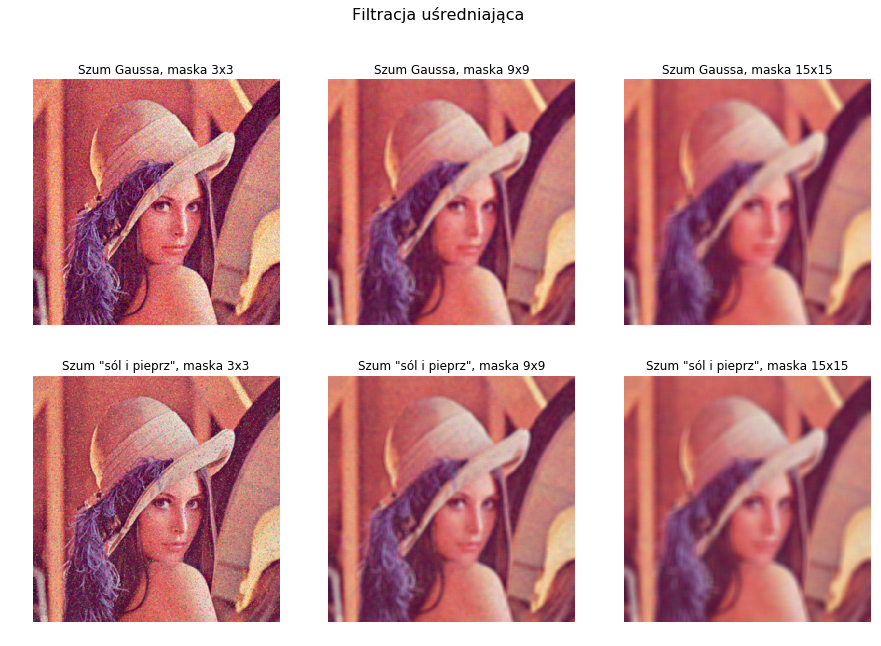

In [4]:
imgGnoiseFavg3 = cv2.blur(imgGauss, (3,3))
imgGnoiseFavg9 = cv2.blur(imgGauss, (9,9))
imgGnoiseFavg15 = cv2.blur(imgGauss, (15,15))

imgSnoiseFavg3 = cv2.blur(imgSaltPepper, (3,3))
imgSnoiseFavg9 = cv2.blur(imgSaltPepper, (9,9))
imgSnoiseFavg15 = cv2.blur(imgSaltPepper, (15,15))

plt.figure(figsize = (15, 10))

plt.subplot(231)
plt.imshow(imgGnoiseFavg3)
plt.title('Szum Gaussa, maska 3x3')
plt.axis('off')
plt.subplot(232)
plt.imshow(imgGnoiseFavg9)
plt.title('Szum Gaussa, maska 9x9')
plt.axis('off')
plt.subplot(233)
plt.imshow(imgGnoiseFavg15)
plt.title('Szum Gaussa, maska 15x15')
plt.axis('off')

plt.subplot(234)
plt.imshow(imgSnoiseFavg3)
plt.title('Szum "sól i pieprz", maska 3x3')
plt.axis('off')
plt.subplot(235)
plt.imshow(imgSnoiseFavg9)
plt.title('Szum "sól i pieprz", maska 9x9')
plt.axis('off')
plt.subplot(236)
plt.imshow(imgSnoiseFavg15)
plt.title('Szum "sól i pieprz", maska 15x15')
plt.axis('off')

plt.suptitle("Filtracja uśredniająca", fontsize=16)
plt.show()

### Filtracja gaussowska

Efekt rozmycia obrazu możemy uzyskać również wykorzystując filtr Gaussa – użyjemy w tym celu funkcji *GaussianBlur()*. Tutaj również należy podać obraz wejściowy, wielkość maski, a także można określić jak ekstrapolować piksele "rozszerzające" obraz. <em>0</em> jest parametrem *sigma*, który określa wielkość odchylenia standardowego (jedna ze zmiennych we wzorze matematycznym). Określa się go zarówno dla kierunku *X* jak i <em>Y</em>. Można pominąć ten parametr (tak jak my w kierunku _Y_), ale wtedy zostanie on obliczony z odpowiedniego przekształcenia wielkości maski – jeśli chcesz mieć pełną kontrolę nad działaniem tej funkcji, lepiej zdefiniować wszystkie parametry.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


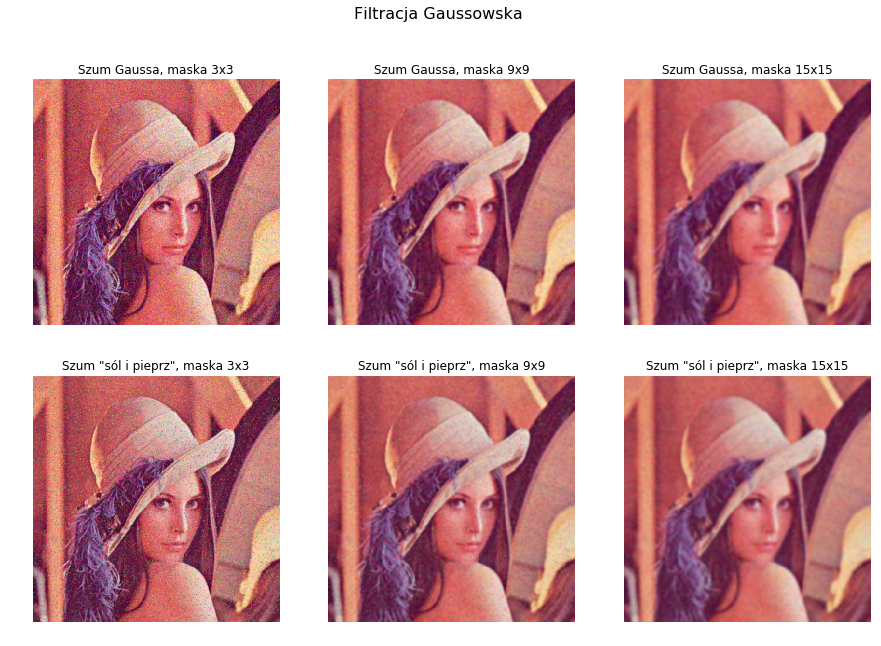

In [5]:
imgGnoiseFgauss3 = cv2.GaussianBlur(imgGauss, (3,3), 0)
imgGnoiseFgauss9 = cv2.GaussianBlur(imgGauss, (9,9), 0)
imgGnoiseFgauss15 = cv2.GaussianBlur(imgGauss, (15,15), 0)

imgSnoiseFgauss3 = cv2.GaussianBlur(imgSaltPepper, (3,3), 0)
imgSnoiseFgauss9 = cv2.GaussianBlur(imgSaltPepper, (9,9), 0)
imgSnoiseFgauss15 = cv2.GaussianBlur(imgSaltPepper, (15,15), 0)

plt.figure(figsize = (15, 10))

plt.subplot(231)
plt.imshow(imgGnoiseFgauss3)
plt.title('Szum Gaussa, maska 3x3')
plt.axis('off')
plt.subplot(232)
plt.imshow(imgGnoiseFgauss9)
plt.title('Szum Gaussa, maska 9x9')
plt.axis('off')
plt.subplot(233)
plt.imshow(imgGnoiseFgauss15)
plt.title('Szum Gaussa, maska 15x15')
plt.axis('off')

plt.subplot(234)
plt.imshow(imgSnoiseFgauss3)
plt.title('Szum "sól i pieprz", maska 3x3')
plt.axis('off')
plt.subplot(235)
plt.imshow(imgSnoiseFgauss9)
plt.title('Szum "sól i pieprz", maska 9x9')
plt.axis('off')
plt.subplot(236)
plt.imshow(imgSnoiseFgauss15)
plt.title('Szum "sól i pieprz", maska 15x15')
plt.axis('off')

plt.suptitle("Filtracja Gaussowska", fontsize=16)
plt.show()

### Filtracja medianowa

Filtrację medianową zrealizujemy za pomocą funkcji *medianBlur()*. Wymaga ona podania obrazu w formacie *uint8*, dlatego musimy przeskalować nasz obraz. W samej funkcji poza podaniem obrazu wejściowego, definiujemy tylko rozmiar maski (okna przetwarzania), który musi być liczbą całkowitą większą od 1.

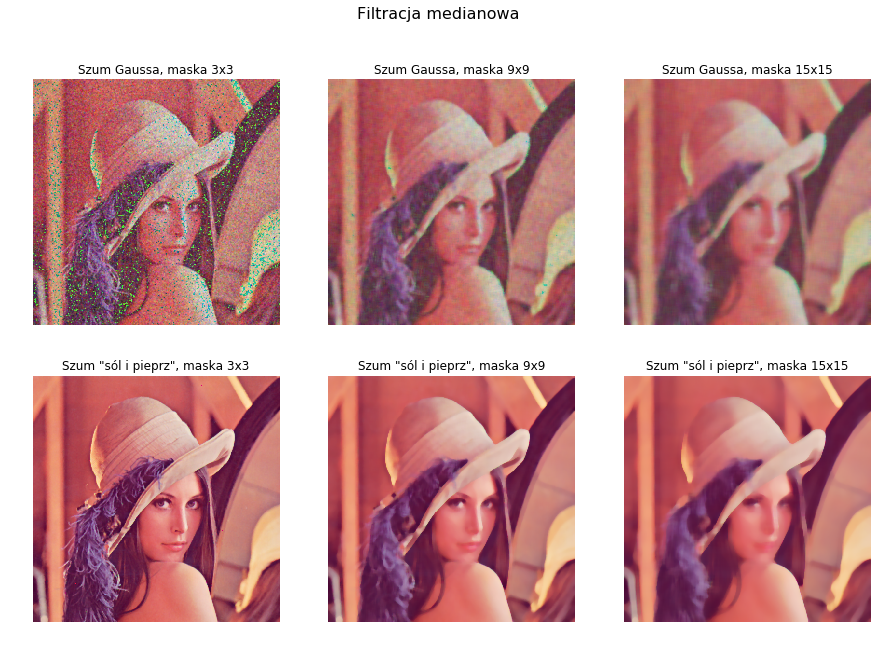

In [6]:
imgGauss = np.array(imgGauss*255, dtype = np.uint8)
imgSaltPepper = np.array(imgSaltPepper*255, dtype = np.uint8)

imgGnoiseFmedian3 = cv2.medianBlur(imgGauss, 3)
imgGnoiseFmedian9 = cv2.medianBlur(imgGauss, 9)
imgGnoiseFmedian15 = cv2.medianBlur(imgGauss, 15)

imgSnoiseFmedian3 = cv2.medianBlur(imgSaltPepper, 3)
imgSnoiseFmedian9 = cv2.medianBlur(imgSaltPepper, 9)
imgSnoiseFmedian15 = cv2.medianBlur(imgSaltPepper, 15)

plt.figure(figsize = (15, 10))

plt.subplot(231)
plt.imshow(imgGnoiseFmedian3)
plt.title('Szum Gaussa, maska 3x3')
plt.axis('off')
plt.subplot(232)
plt.imshow(imgGnoiseFmedian9)
plt.title('Szum Gaussa, maska 9x9')
plt.axis('off')
plt.subplot(233)
plt.imshow(imgGnoiseFmedian15)
plt.title('Szum Gaussa, maska 15x15')
plt.axis('off')

plt.subplot(234)
plt.imshow(imgSnoiseFmedian3)
plt.title('Szum "sól i pieprz", maska 3x3')
plt.axis('off')
plt.subplot(235)
plt.imshow(imgSnoiseFmedian9)
plt.title('Szum "sól i pieprz", maska 9x9')
plt.axis('off')
plt.subplot(236)
plt.imshow(imgSnoiseFmedian15)
plt.title('Szum "sól i pieprz", maska 15x15')
plt.axis('off')

plt.suptitle("Filtracja medianowa", fontsize=16)
plt.show()

Jak widzisz, do różnych typów zakłóceń warto wykorzystać inne metody filtracji. Niestety nie istnieje jakieś "idealne rozwiązanie", które będzie w stanie poprawić nam każdy obraz, dlatego należy wiedzieć, jakie efekty osiągane są przez daną metodę filtracji. Zauważ też, że przy stosowaniu większych masek, stracimy również więcej informacji.